In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from py4etrics import tobit
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("data/georgian_bay_secchi.csv")
df.head(15)

,secchi,date,depth,alkalinity,calcium,chlorophyll_a_corrected,chlorophyll_a_total,chlorophyll_b_total,chloride,color,...,nitrates_total,nitrogen,ph,phosphate,phosphorus_unfiltered,phosphorus_total,residue,silicates,sulphate,turbidity
0,4.1,27-Apr-04,21.7,36.30,12.40,1.000,0.500,0.100,6.20,14.80,...,0.289,0.190,7.890,0.001,0.004,5.4,0.50,1.10,8.90,0.310
1,4.0,10-Aug-04,21.8,43.75,14.40,2.333,3.400,0.133,6.35,6.55,...,0.140,0.220,8.005,0.001,0.008,5.7,0.90,0.48,10.00,0.610
2,5.3,27-Oct-04,21.9,47.65,16.00,2.000,2.700,0.100,6.30,6.20,...,0.201,0.200,7.945,0.001,0.007,5.3,0.50,0.37,10.35,0.285
3,6.3,26-Apr-05,20.2,54.25,17.85,1.000,0.600,0.100,7.65,5.50,...,0.240,0.180,8.010,0.001,0.006,2.3,0.50,1.14,11.30,0.085
4,4.4,26-Jul-05,20.8,66.05,22.75,2.000,2.933,0.200,8.70,4.05,...,0.176,0.210,8.240,0.001,0.004,4.4,1.00,0.80,11.00,0.370
5,9.0,26-Oct-05,20.6,73.25,22.95,1.000,1.100,0.100,7.00,1.20,...,0.215,0.180,8.180,0.001,0.005,2.8,0.50,0.78,13.50,0.220
6,4.6,28-Apr-04,8.8,59.20,19.60,1.000,0.733,0.100,5.40,9.30,...,0.271,0.180,8.110,0.001,0.002,3.8,0.60,0.82,12.50,0.330
7,5.2,11-Aug-04,9.5,68.75,22.30,1.000,1.467,0.100,5.90,1.10,...,0.126,0.200,8.305,0.001,0.012,3.9,0.80,0.60,13.50,1.015
8,7.3,26-Oct-04,8.9,71.95,23.20,1.000,0.900,0.100,6.10,1.50,...,0.254,0.185,8.145,0.001,0.005,4.4,0.60,1.22,13.20,0.365
9,4.9,27-Apr-04,23.2,45.10,15.20,1.000,0.867,0.100,6.20,9.30,...,0.298,0.180,8.010,0.001,0.006,4.1,0.50,0.92,10.50,0.190


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values_count = missing_values[missing_values > 0]
total_missing_values = missing_values_count.sum()

print(missing_values_count)
print("\nTotal Missing Values: ", total_missing_values)

calcium                  16
conductivity_estimate    16
hardness                 16
potassium                16
magnesium                16
sodium                   16
dtype: int64

Total Missing Values:  96


In [7]:
len(df[df['secchi'].astype('str').str.contains(">")]) # number of censored observations

45

In [8]:
df['censored'] = np.where(df['secchi'].astype('str').str.contains(">"), 1, 0)
df['secchi_depth'] = df['secchi'].astype(str).str.replace(r"\>", "", regex=True).astype("float")
df['intercept'] = 1

In [9]:
features = list(df.drop(columns=['secchi', 'date', 'depth', 'censored', 'secchi_depth', 'intercept']).columns)

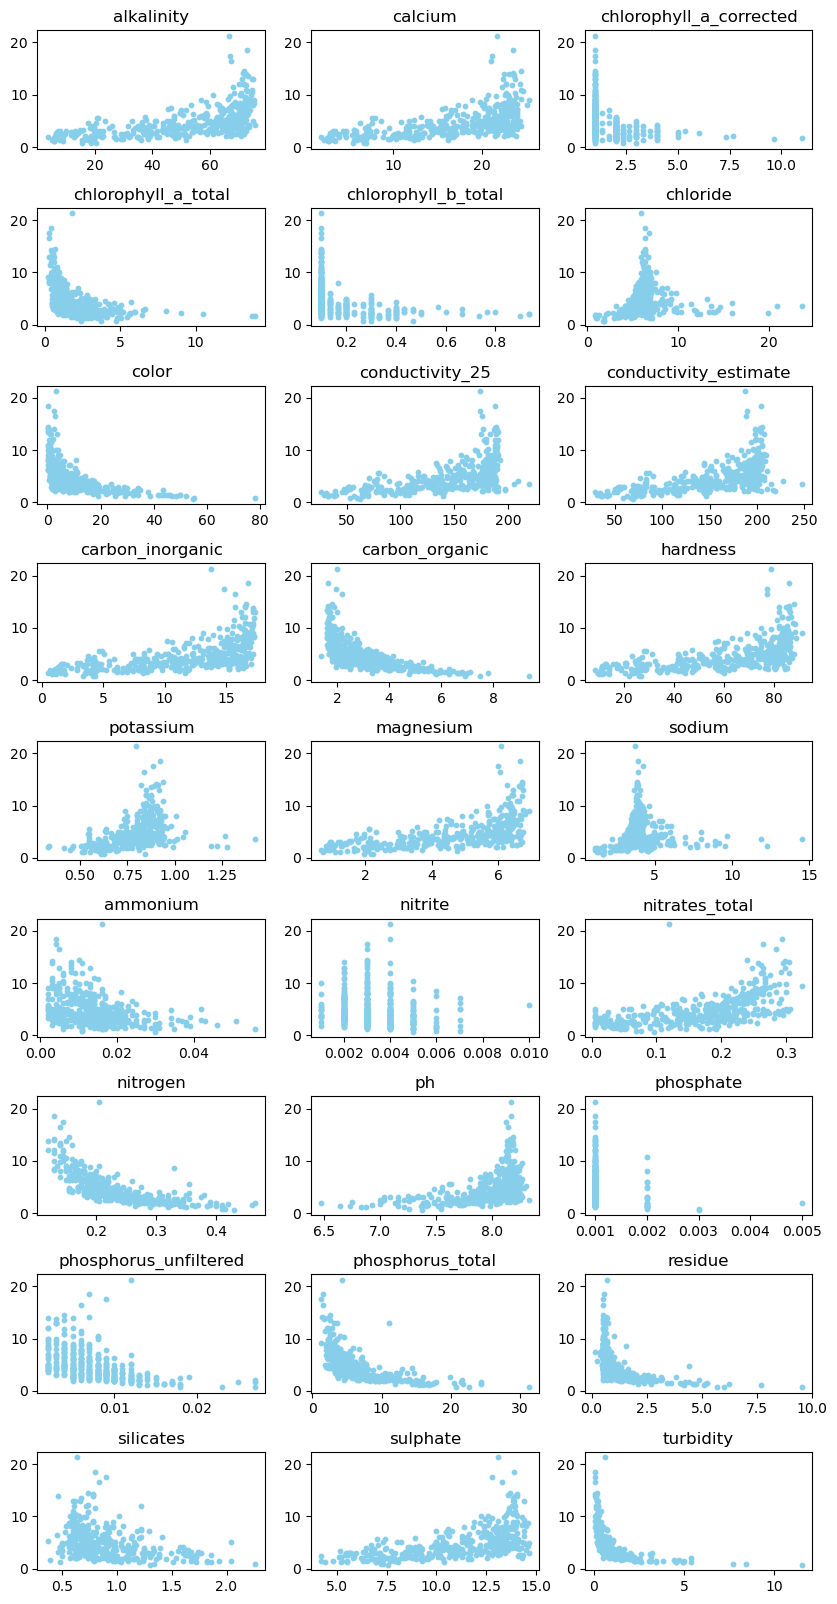

In [10]:
fig = plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(features):
    ax = fig.add_subplot(9,3, i+1)
    ax.scatter(df[col], df['secchi_depth'], color='skyblue', s=10)
    ax.set_title(col)